In [110]:
import scipy.io as io
import torch 
import numpy as np
dset = io.loadmat('matlab_dataset/insect_dataset.mat')

In [111]:
#all_dnas = dset['all_dnas']
all_labels = dset['all_labels']-1
all_dna_features_cnn_original = dset['all_dna_features_cnn_original']
all_image_features_resnet = dset['all_image_features_resnet']

train_loc = dset['train_loc']-1
val_seen_loc = dset['val_seen_loc']-1
val_unseen_loc = dset['val_unseen_loc']-1


species2genus = dset['species2genus'] - 1


In [112]:
all_concat_matlab =np.concatenate((all_dna_features_cnn_original,all_image_features_resnet),axis=1)

In [113]:
train_features_matlab = np.squeeze(all_concat_matlab[train_loc])
val_seen_features_matlab = np.squeeze(all_concat_matlab[val_seen_loc])
train_labels = np.squeeze(all_labels[0][train_loc])-1
val_seen_labels = np.squeeze(all_labels[0][val_seen_loc])-1

# Convert labels to genuses

In [114]:
#$train_labels = np.squeeze(species2genus[train_labels])
#val_seen_labels = np.squeeze(species2genus[val_seen_labels])

In [115]:
train_labels.shape

(13039,)

# Fit random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(min_samples_leaf=2,n_jobs=-1)
clf = clf.fit(train_features_matlab,train_labels)

In [85]:
train_predicted_labels = clf.predict(train_features_matlab)
print(f"Training species accuracy:\
{np.count_nonzero(train_predicted_labels==train_labels)/len(train_labels)}")

Training species accuracy:1.0


In [86]:
val_predicted_labels= clf.predict(val_seen_features_matlab)
print(f"Validation species accuracy:{np.count_nonzero(val_predicted_labels==val_seen_labels)/len(val_seen_labels)}")

Validation species accuracy:0.981756338899196


In [59]:
import matplotlib.pyplot as plt

In [60]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

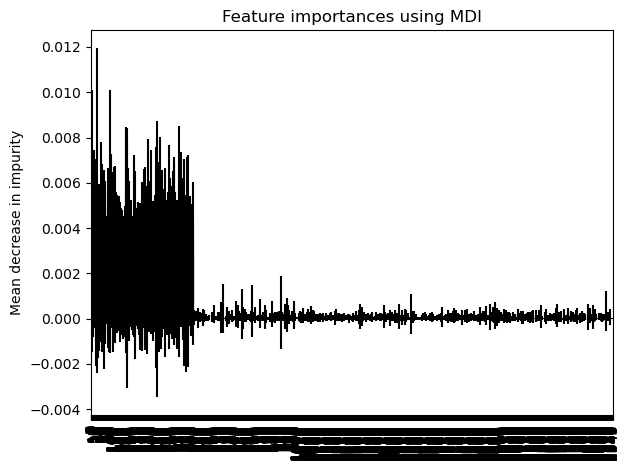

In [61]:
import pandas as pd

forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

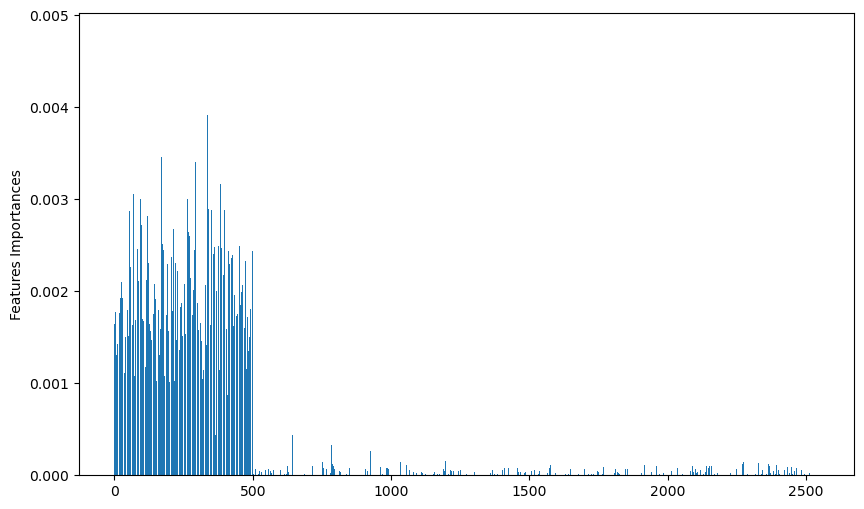

In [62]:
feature_names = [f'Feature {i+1}' for i in range(train_features_matlab.shape[1])]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, align='center')
plt.ylabel('Features Importances')
plt.show()

# Pytorch performance GAN+new CNN

In [116]:
all_dna_features_cnn_new= dset['all_dna_features_cnn_new']
all_image_features_gan = dset['all_image_features_gan']

all_concat_torch =np.concatenate((all_dna_features_cnn_new,all_image_features_gan),axis=1)

In [117]:
train_features_torch = np.squeeze(all_concat_torch[train_loc])
val_seen_features_torch= np.squeeze(all_concat_torch[val_seen_loc])

In [118]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(min_samples_leaf=2,n_jobs=-1)
clf = clf.fit(train_features_torch,train_labels)

In [119]:
train_predicted_labels = clf.predict(train_features_torch)
print(f"Training species accuracy:\
{np.count_nonzero(train_predicted_labels==train_labels)/len(train_labels)}")

Training species accuracy:0.9999233070020707


In [120]:
val_predicted_labels= clf.predict(val_seen_features_torch)
print(f"Validation species accuracy:{np.count_nonzero(val_predicted_labels==val_seen_labels)/len(val_seen_labels)}")

Validation species accuracy:0.9836116264687693


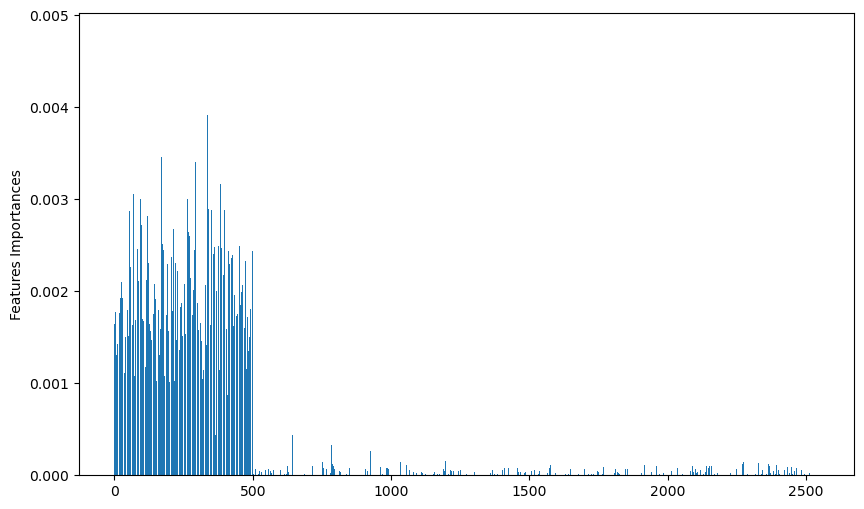

In [103]:
feature_names = [f'Feature {i+1}' for i in range(train_features_matlab.shape[1])]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, align='center')
plt.ylabel('Features Importances')
plt.show()